In [1]:
import sys
import numpy as np
import string
import matplotlib.pyplot as plt
# add the path of gotmtool
sys.path.append("../gotmtool")
from gotmtool import *
from gotmtool.diags import *

## Load data

First, store the information of the four simulations into lists and dictionaries. 

In [2]:
mlist = ['KPP-CVMix', 'GLS-C01A']
flist = ['ref', 'pos', 'neg']
clist = ['C1', 'C4', 'C5', 'C6', 'C7', 'C8', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']
cases = {}
caselabels = {}
for ctag in clist:
    casenames = []
    labels = []
    for mtag in mlist:
        for ftag in flist:
            casename = '{}_{}_{}'.format(ctag, ftag, mtag)
            print(casename)
            casenames.append(casename)
            label = '{}_{}'.format(ftag, mtag)
            labels.append(label)
    cases[ctag] = casenames
    caselabels[ctag] = labels
        
colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:red', 'tab:red', 'tab:red']

linestyles = ['-', '--', ':', '-', '--', ':']

casedir = '../gotm/run/SD_1D'
save_fig = False

C1_ref_KPP-CVMix
C1_pos_KPP-CVMix
C1_neg_KPP-CVMix
C1_ref_GLS-C01A
C1_pos_GLS-C01A
C1_neg_GLS-C01A
C4_ref_KPP-CVMix
C4_pos_KPP-CVMix
C4_neg_KPP-CVMix
C4_ref_GLS-C01A
C4_pos_GLS-C01A
C4_neg_GLS-C01A
C5_ref_KPP-CVMix
C5_pos_KPP-CVMix
C5_neg_KPP-CVMix
C5_ref_GLS-C01A
C5_pos_GLS-C01A
C5_neg_GLS-C01A
C6_ref_KPP-CVMix
C6_pos_KPP-CVMix
C6_neg_KPP-CVMix
C6_ref_GLS-C01A
C6_pos_GLS-C01A
C6_neg_GLS-C01A
C7_ref_KPP-CVMix
C7_pos_KPP-CVMix
C7_neg_KPP-CVMix
C7_ref_GLS-C01A
C7_pos_GLS-C01A
C7_neg_GLS-C01A
C8_ref_KPP-CVMix
C8_pos_KPP-CVMix
C8_neg_KPP-CVMix
C8_ref_GLS-C01A
C8_pos_GLS-C01A
C8_neg_GLS-C01A
P1_ref_KPP-CVMix
P1_pos_KPP-CVMix
P1_neg_KPP-CVMix
P1_ref_GLS-C01A
P1_pos_GLS-C01A
P1_neg_GLS-C01A
P2_ref_KPP-CVMix
P2_pos_KPP-CVMix
P2_neg_KPP-CVMix
P2_ref_GLS-C01A
P2_pos_GLS-C01A
P2_neg_GLS-C01A
P3_ref_KPP-CVMix
P3_pos_KPP-CVMix
P3_neg_KPP-CVMix
P3_ref_GLS-C01A
P3_pos_GLS-C01A
P3_neg_GLS-C01A
P4_ref_KPP-CVMix
P4_pos_KPP-CVMix
P4_neg_KPP-CVMix
P4_ref_GLS-C01A
P4_pos_GLS-C01A
P4_neg_GLS-C01A
P5_ref_KPP

Load data for the four simulations into a dictionary.

In [3]:
casedataset = {}
for ctag in clist:
    sims = {}
    dataset = {}
    for case in cases[ctag]:
        sim = Simulation(path=casedir+'/'+case)
        sims[case] = sim
        dataset[case] = sim.load_data()
    casedataset[ctag] = dataset

## Figure 1


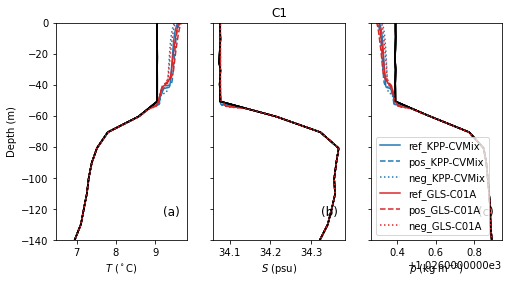

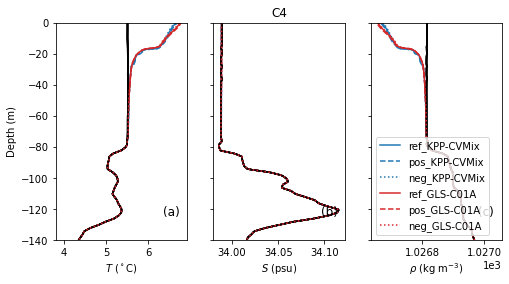

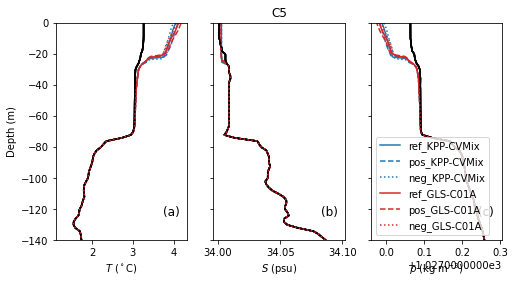

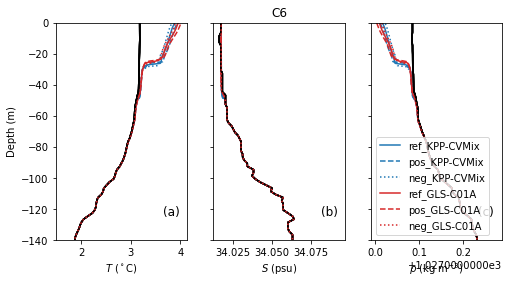

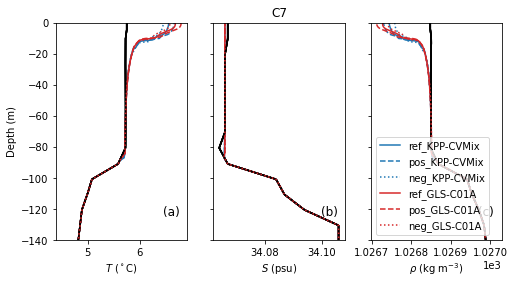

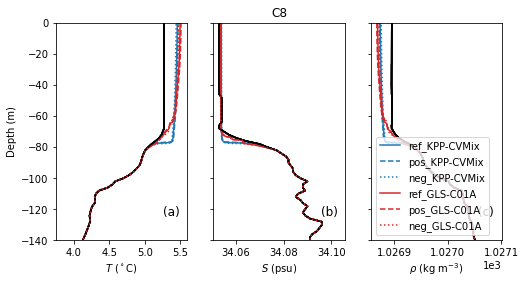

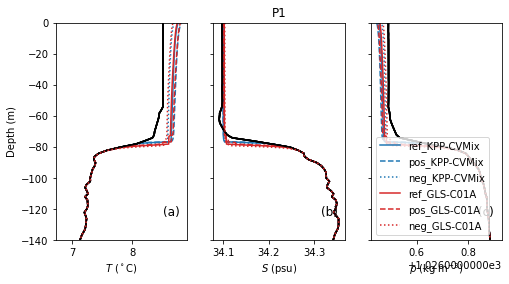

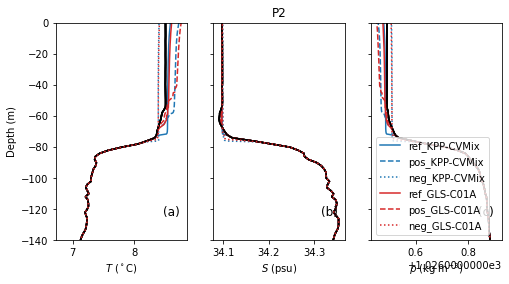

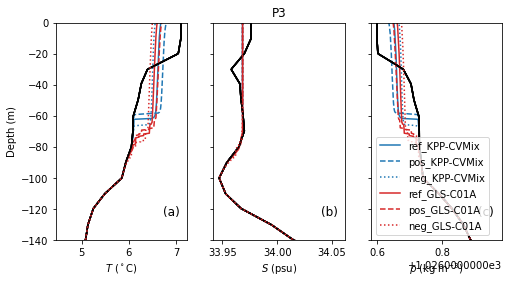

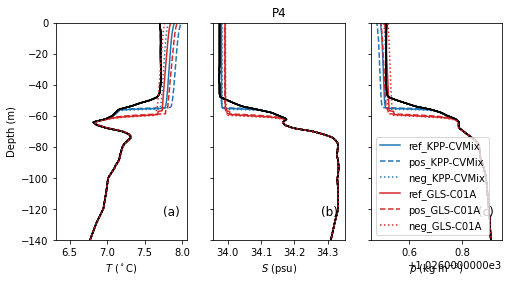

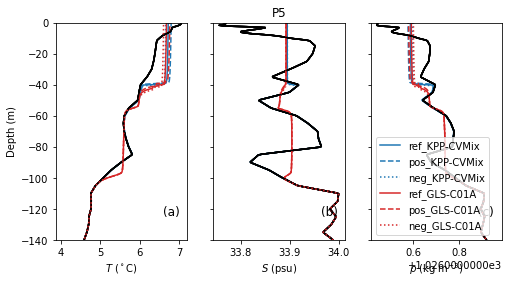

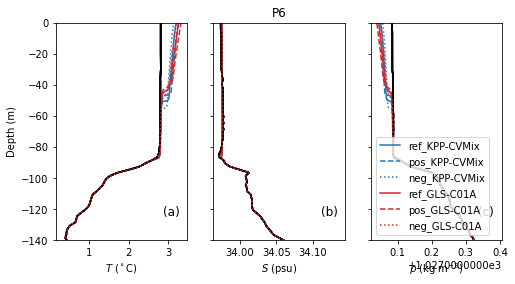

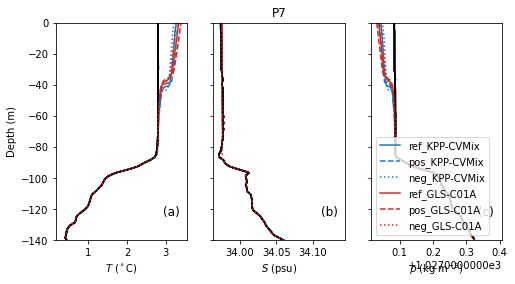

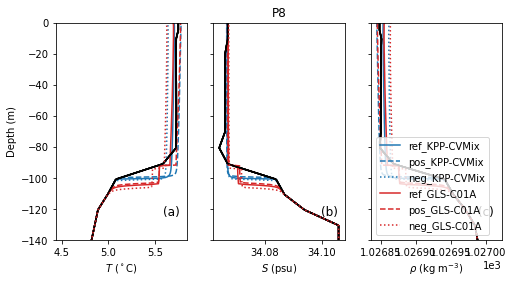

In [4]:
for ctag in clist:
    casenames = cases[ctag]
    dataset = casedataset[ctag]
    labels = caselabels[ctag] 
    fig, axarr = plt.subplots(1,3, sharey='row')
    fig.set_size_inches([8,4])
    for i, case in enumerate(casenames):
        data = dataset[case]
        data.temp[:,0,0,0].plot(y='z', ax=axarr[0], color='k')
        data.salt[:,0,0,0].plot(y='z', ax=axarr[1], color='k')
        data.rho[:,0,0,0].plot(y='z', ax=axarr[2], color='k')
        data.temp[:,-1,0,0].plot(y='z', ax=axarr[0], color=colors[i], linestyle=linestyles[i])
        data.salt[:,-1,0,0].plot(y='z', ax=axarr[1], color=colors[i], linestyle=linestyles[i])
        data.rho[:,-1,0,0].plot(y='z', ax=axarr[2], color=colors[i], linestyle=linestyles[i], label=labels[i])

    for i in np.arange(3):
        axarr[i].set_title('') 
        axarr[i].set_ylabel('') 

    axarr[0].set_ylim([-140,0])
    # axarr[0].set_xlim([8.8, 9.9])
    axarr[0].set_ylabel('Depth (m)')
    axarr[0].set_xlabel('$T$ ($^\circ$C)')
    axarr[1].set_xlabel('$S$ (psu)')
    # axarr[1].set_xlim([33.87,33.94])
    axarr[2].set_xlabel('$\\rho$ (kg m$^{-3}$)')
    # axarr[2].set_xlim([1026.55,1026.75])
    axarr[2].ticklabel_format(axis="x", style="sci", scilimits=(-2,2))

    axarr[2].legend(loc='lower left')
    axarr[1].set_title(ctag)

    for i, ax in enumerate(axarr):
        ax.text(0.82, 0.1, '('+string.ascii_lowercase[i]+')', transform=ax.transAxes,
                fontsize=12, va='bottom')

    if save_fig:
        plt.tight_layout()
        figname = 'constant_forcing_pfl_{}.pdf'.format(ctag)
        fig.savefig(figname, dpi=300)

## Figure 2

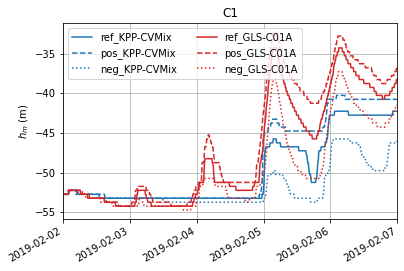

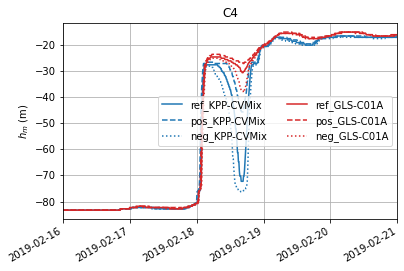

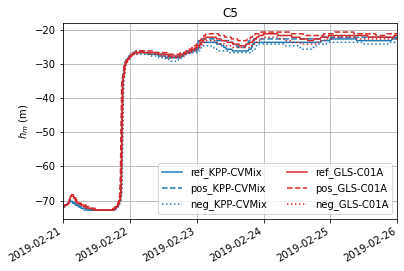

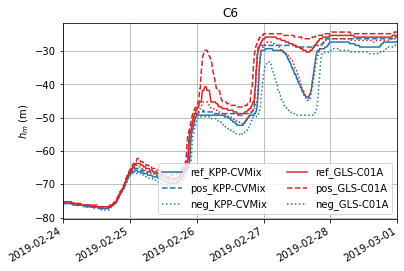

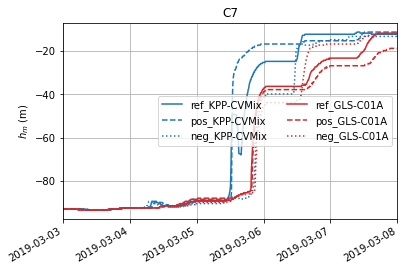

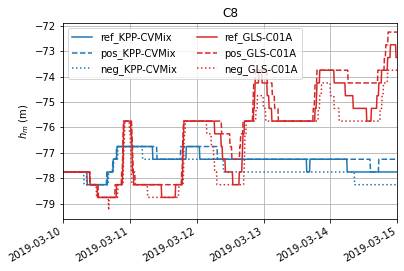

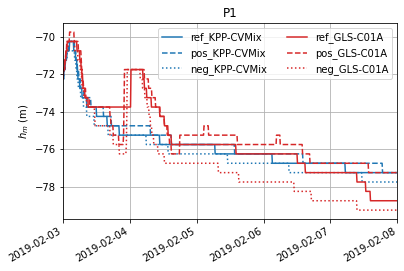

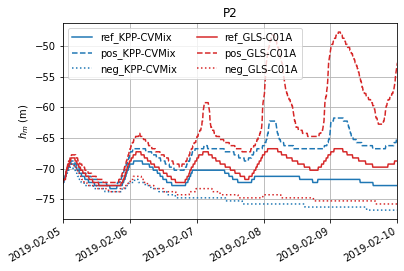

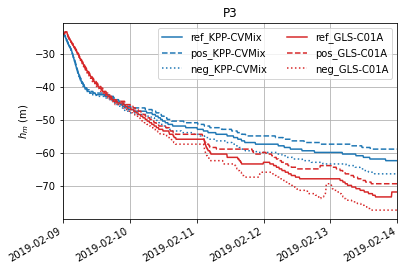

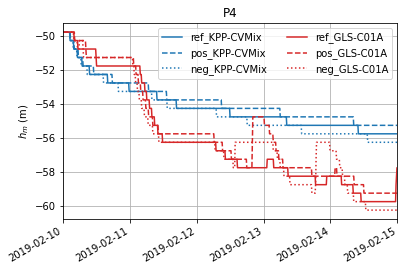

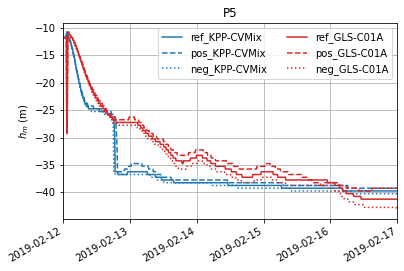

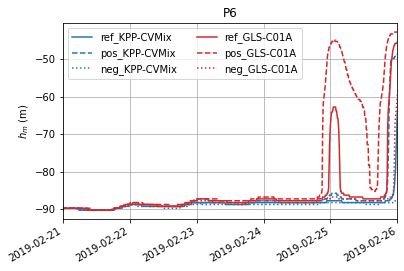

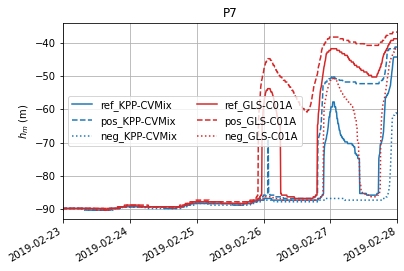

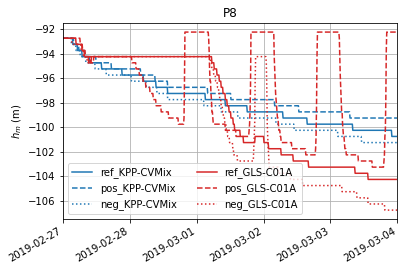

In [5]:
for ctag in clist:
    casenames = cases[ctag]
    dataset = casedataset[ctag]
    labels = caselabels[ctag]
    fig = plt.figure(figsize=[6,4])
    for i, case in enumerate(casenames):
        data = dataset[case]
        time = data.time
    #     NN = data.NN[:,:,0,0]
    #     mld = get_bld_maxNN(NN)
    #     temp = data.temp
    #     mld = -get_mld_deltaT(temp[:,:,0,0])
        rho = data.rho
        mld = -get_mld_deltaR(rho[:,:,0,0])
        plt.plot(time, mld.values, color=colors[i], linestyle=linestyles[i], label=labels[i])
    #     plt.scatter(hours, mld.values, s=10, color=colors[case], label=labels[case])
    plt.ylabel('$h_m$ (m)')
    plt.xlabel('')
    plt.xlim([time[0], time[-1]])
#     plt.ylim([ymin[argo_label],ymax[argo_label]])
    # plt.legend(loc='lower left')
    plt.legend(ncol=2)
    plt.title(ctag)
    plt.grid()
    fig.autofmt_xdate()
    if save_fig:
        plt.tight_layout()
        figname = 'constant_forcing_ts_{}.pdf'.format(ctag)
        fig.savefig(figname, dpi=300)

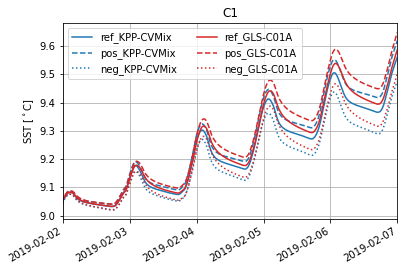

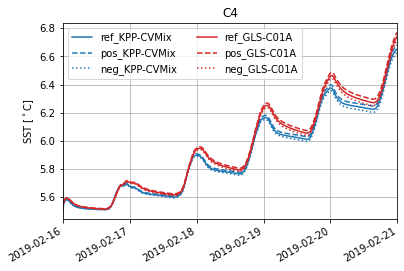

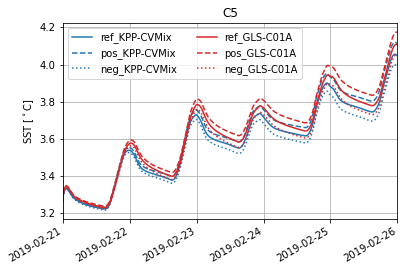

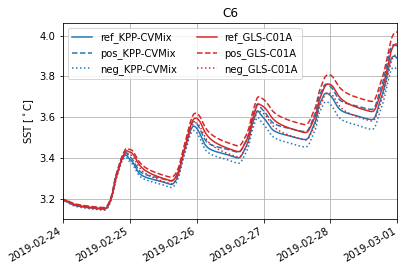

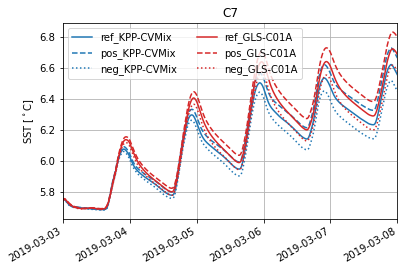

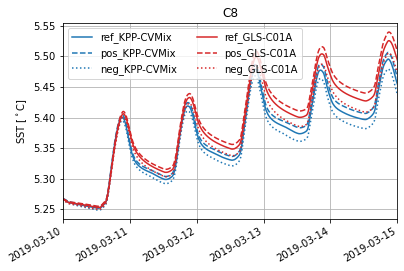

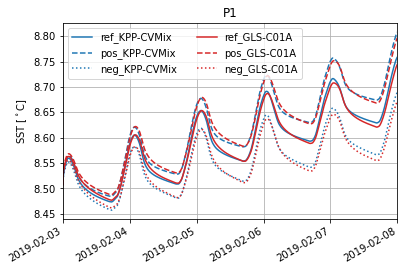

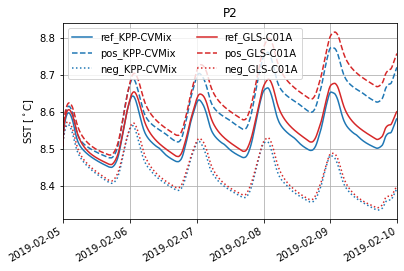

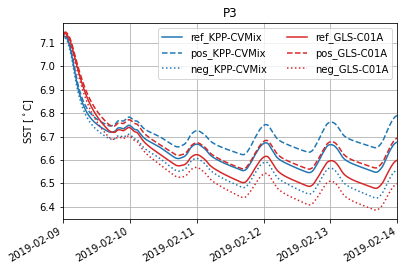

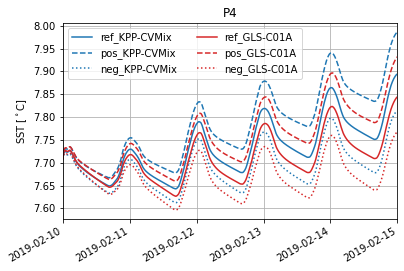

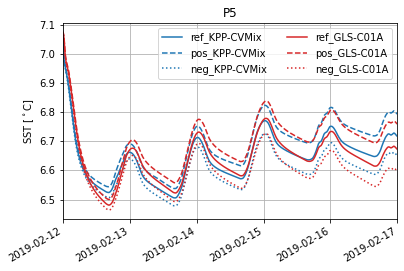

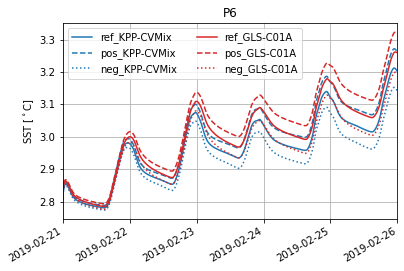

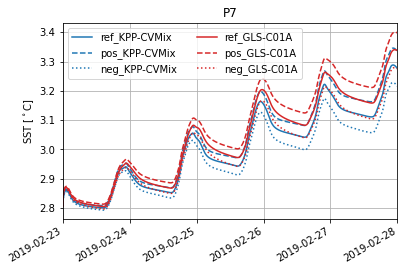

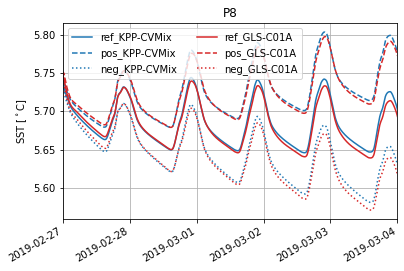

In [8]:
for ctag in clist:
    casenames = cases[ctag]
    dataset = casedataset[ctag]
    labels = caselabels[ctag]
    fig = plt.figure(figsize=[6,4])
    for i, case in enumerate(casenames):
        data = dataset[case]
        time = data.time
        sst = data.temp[-1,:,0,0]
        plt.plot(time, sst.values, color=colors[i], linestyle=linestyles[i], label=labels[i])
    #     plt.scatter(hours, mld.values, s=10, color=colors[case], label=labels[case])
    plt.ylabel('SST [$^\circ$C]')
    plt.xlabel('')
    plt.xlim([time[0], time[-1]])
#     plt.ylim([ymin[argo_label],ymax[argo_label]])
    # plt.legend(loc='lower left')
    plt.legend(ncol=2)
    plt.title(ctag)
    plt.grid()
    fig.autofmt_xdate()
    if save_fig:
        plt.tight_layout()
        figname = 'constant_forcing_ts_SST_{}.pdf'.format(ctag)
        fig.savefig(figname, dpi=300)